<h1 style="text-align: center; font-size: 2em; font-family: 'Arial'; font-weight: bold; color: #3498db;">Big Mart mini project for Technocolabs Data Analysit Internship.</h1>
<h2 style="text-align: center; font-size: 1.5em; font-family: 'Arial'; font-weight: bold; color: #f1c40f;">by Muhammad Yaseen Ayub</h2>

<p style="text-align: center; font-size: 1em; font-family: 'Arial'; color: #f1c40f;">Email: yaseen.ayub@ieee.org</p>
<hr style="height: 5px; border: none; color: #f1c40f; background-color: #f1c40f;">

<p style="font-size: 1.45em; font-family: 'Arial'; color: #34495e;">Project Description.</p>

<p style="text-align: left; font-size: 1.1em; font-family: 'Arial'; color: #34495e;">The data scientists at BigMart have collected 2013 sales data for 1559 products across 10 stores in different cities. Also, certain attributes of each product and store have been defined. The aim of this data science project is to build a predictive model and find out the sales of each product at a particular store. Using this model, BigMart will try to understand the properties of products and stores which play a key role in increasing sales. The data has missing values as some stores do not report all the data due to technical glitches. Hence, it will be required to treat them accordingly.</p>

## <div class="alert alert-success">Problem Description.</div>

<p style="text-align: left; font-size: 1.1em; font-family: 'Arial'; color: #34495e;">The aim of this data science project is to build a predictive model and find out the sales of each product at a particular store. Using it we will get insights about which particular product or which particular stores (out of 10) are contributing more to increasing sales of Big Mart.</p>

## <div class="alert alert-success">Hypothesis Generation.</div>

> “A hypothesis may be simply defined as a guess. A scientific hypothesis is an intelligent guess.” – Isaac Asimov

<p style="text-align: left; font-size: 1.1em; font-family: 'Arial'; color: #34495e;">Hypothesis generation is basically an intelligent guess about certain factors which impact the business and needs to be solved using Machine Learning. In this step we will need to brainstorm on the problem in hand and figure out the factors that might impact our target variable. It is said that hypothesis generation process should be done before looking at the actual data because if we know the data before hypothesis generation we might end up being biased.

From the above mentioned problem statement we can drive following hypothesis
1. Store size may effect the sales.
2. Location can play important role.
3. Sales can be higher when an event is near or it is end of year.
4. Specific food items might have higher sale.
5. Gender may effect the item purchased.
6. More high end stores might generate more sales.
</p>


## <div class="alert alert-success">Loading Packages and Data.</div>

In [1]:
#Loading Pakages
import numpy as np
import pandas as pd
from sklearn import preprocessing
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
import xgboost as xgb
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from keras.utils.vis_utils import plot_model
import matplotlib.pyplot as plt
from plotnine import *
from sklearn.metrics import r2_score
import seaborn as sb


In [2]:
# Loading Data
data = pd.read_csv('dataset/Train.csv')
Test_data = pd.read_csv('dataset/Test.csv')

## <div class="alert alert-success">Exploratory Data Analysis.</div>

In [3]:
data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [4]:
print(data['Item_Fat_Content'].unique(),'\n')
print(data['Item_Type'].unique(),'\n')
print(data['Outlet_Identifier'].unique(),'\n')
print(data['Outlet_Size'].unique(),'\n')
print(data['Outlet_Location_Type'].unique(),'\n')
print(data['Outlet_Type'].unique(),'\n')

['Low Fat' 'Regular' 'low fat' 'LF' 'reg'] 

['Dairy' 'Soft Drinks' 'Meat' 'Fruits and Vegetables' 'Household'
 'Baking Goods' 'Snack Foods' 'Frozen Foods' 'Breakfast'
 'Health and Hygiene' 'Hard Drinks' 'Canned' 'Breads' 'Starchy Foods'
 'Others' 'Seafood'] 

['OUT049' 'OUT018' 'OUT010' 'OUT013' 'OUT027' 'OUT045' 'OUT017' 'OUT046'
 'OUT035' 'OUT019'] 

['Medium' nan 'High' 'Small'] 

['Tier 1' 'Tier 3' 'Tier 2'] 

['Supermarket Type1' 'Supermarket Type2' 'Grocery Store'
 'Supermarket Type3'] 



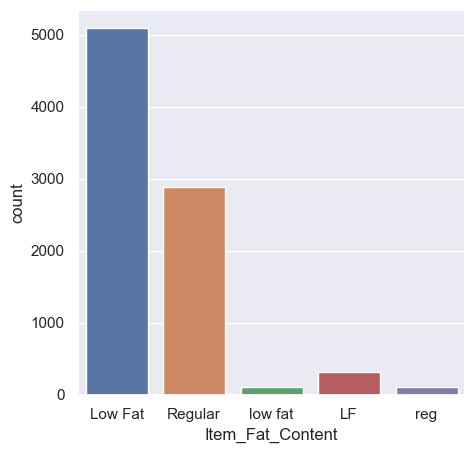

In [5]:
sb.set()
plt.figure(figsize= (5,5))
sb.countplot(x='Item_Fat_Content', data=data)
plt.show()

<hr style="height: 2px; border: none; color: #f1c40f; background-color: #002147;">


#### We can see that there are some repeated categories in  <font color=red>'Item_Fat_Content'</font>. Low Fat is repeated 3 time similarly Regular is repeated 2 times
#### Lets Fix that

<hr style="height: 2px; border: none; color: #f1c40f; background-color: #002147;">

In [6]:
data['Item_Fat_Content'].replace({'LF':'Low Fat','low fat':'Low Fat','reg':'Regular'},inplace=True)

In [7]:
print(data['Item_Fat_Content'].unique(),'\n')

['Low Fat' 'Regular'] 



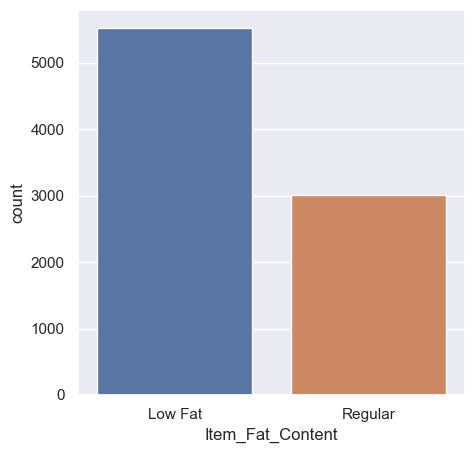

In [8]:
plt.figure(figsize= (5,5))
sb.countplot(x='Item_Fat_Content', data=data)
plt.show()

In [9]:
data.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [11]:
data.columns


Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales'],
      dtype='object')

In [12]:
Test_data.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type'],
      dtype='object')

<hr style="height: 2px; border: none; color: #f1c40f; background-color: #002147;">
<p style="text-align: left; font-size: 1em; font-family: 'Arial'; font-weight: bold; color: black;"><font color=black>We can see above that</font>, <font color=red>Item_Outlet_Sales</font> and <font color=black>is present in Train_data but is not present in Test_data because it is the target variable that we will predict using Machine learning</font>.</p>
<br>

<hr style="height: 2px; border: none; color: #f1c40f; background-color: #002147;">

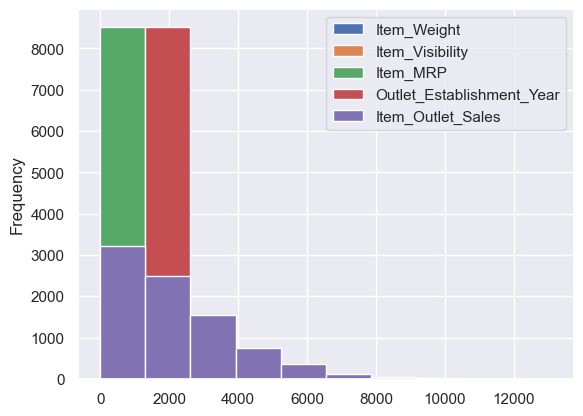

In [13]:
data.plot(kind="hist")
plt.show()

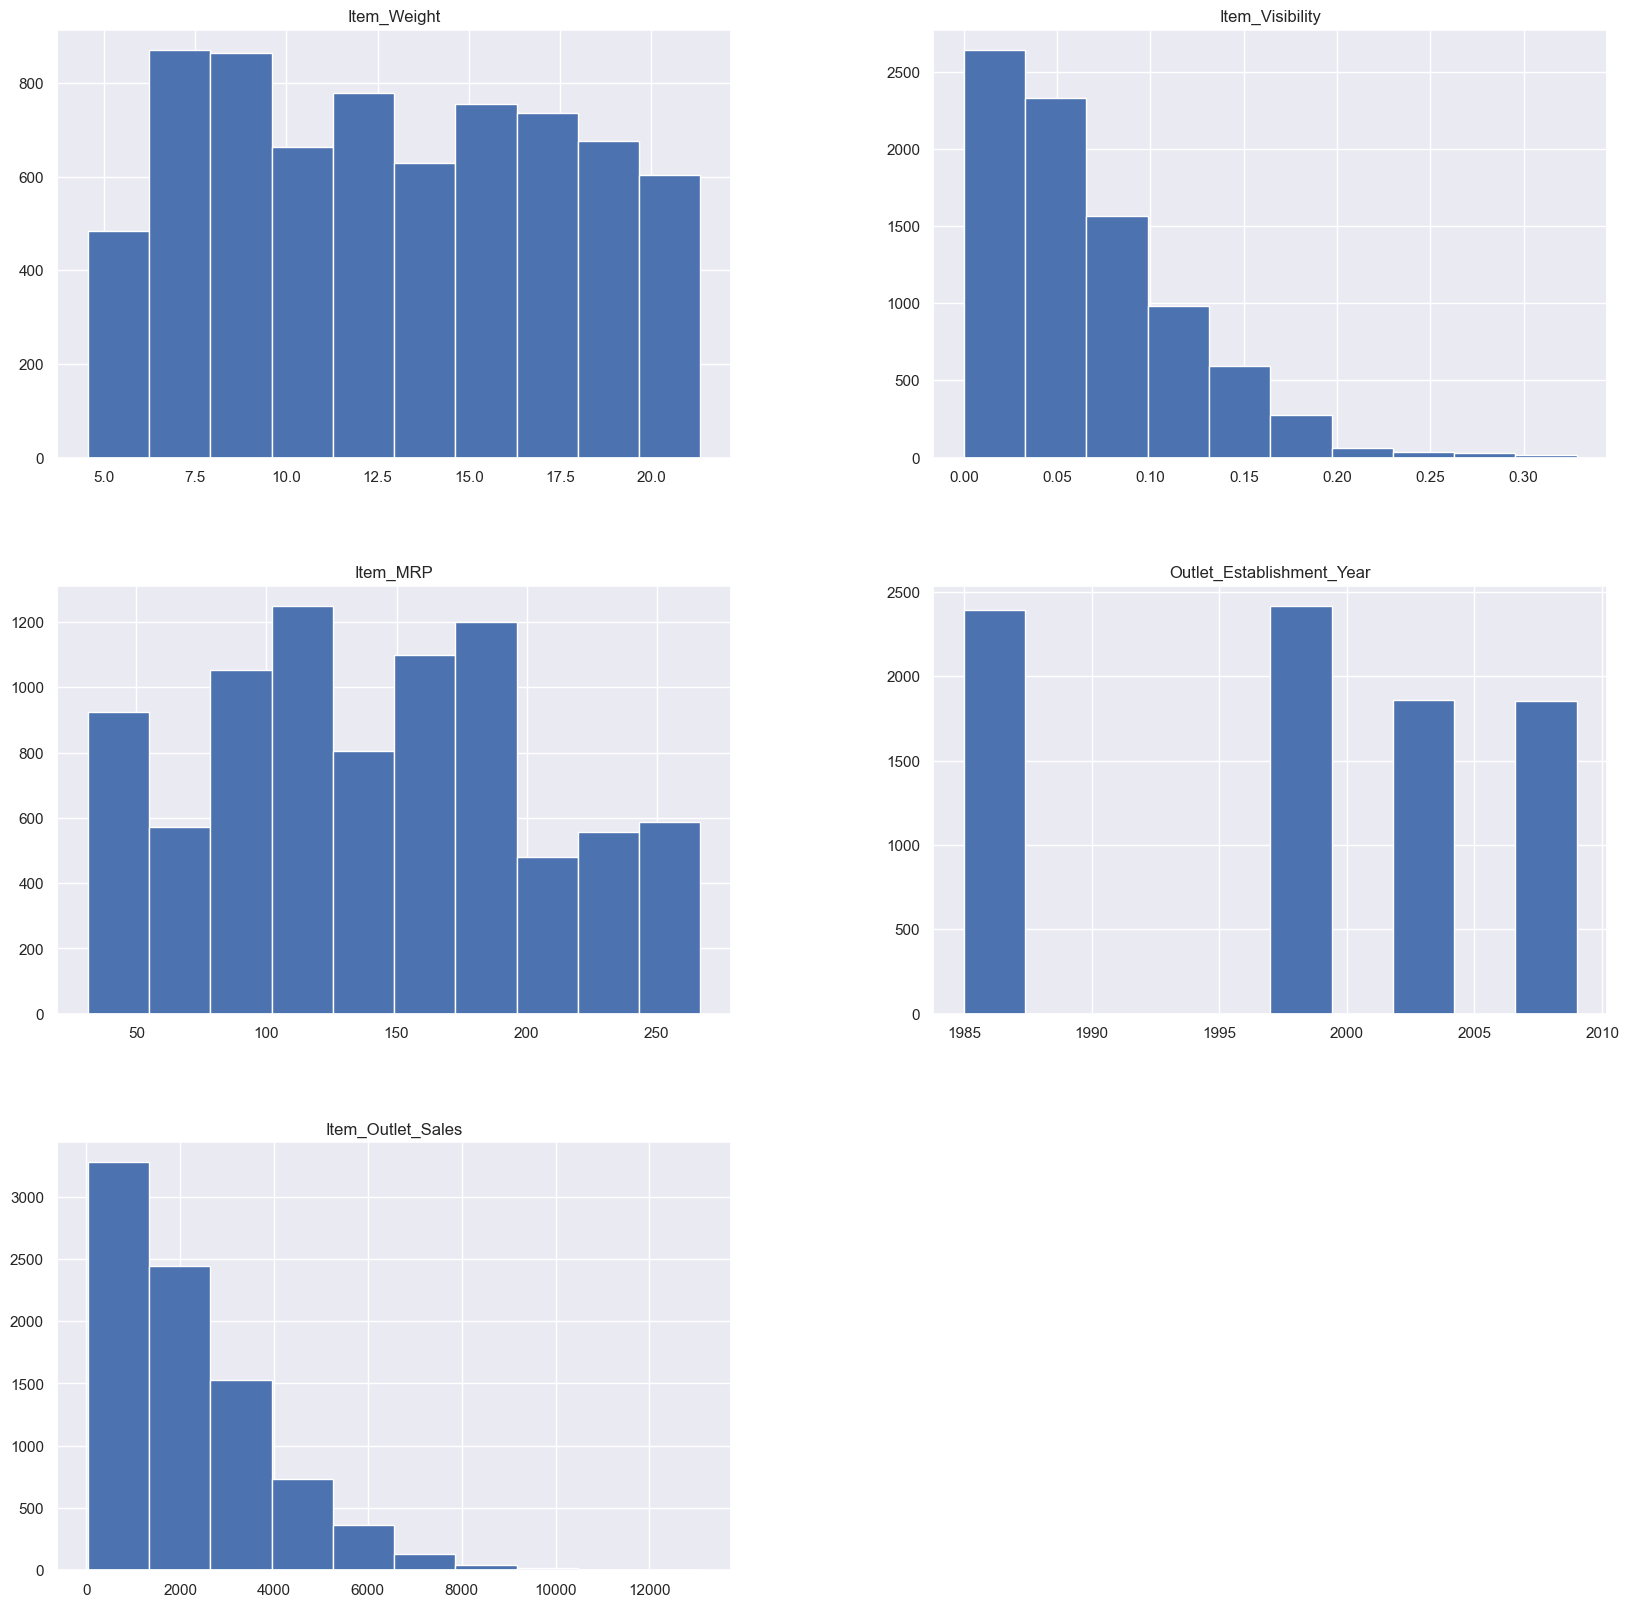

In [14]:
data.hist(figsize=(20, 20))
plt.show()

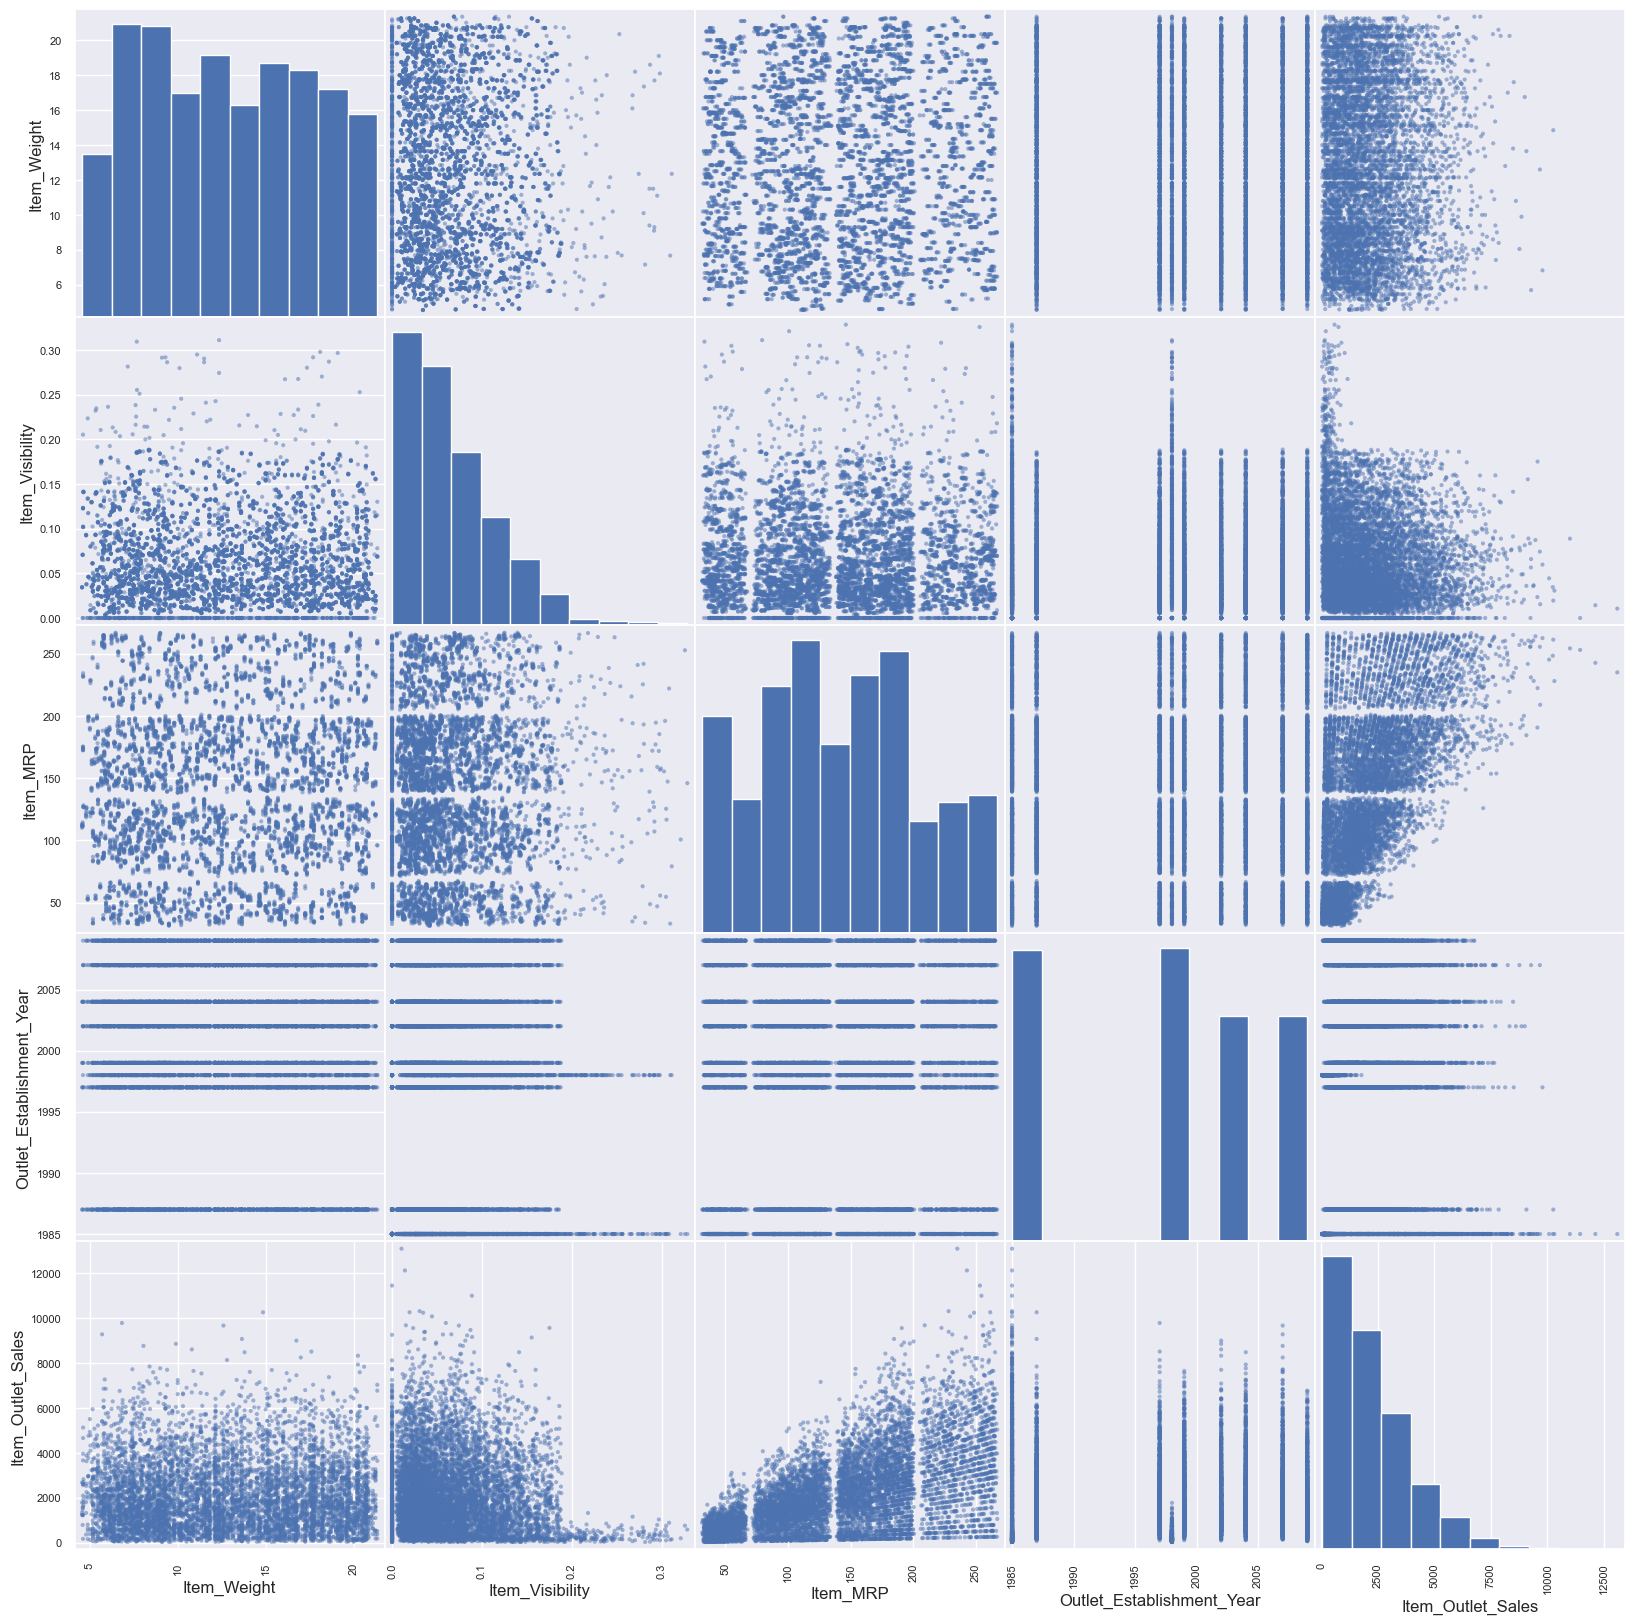

In [15]:
pd.plotting.scatter_matrix(data, figsize=(20, 20))
plt.show()

### Year of Establisment of Outlet

C:\Users\Muhammad Yaseen Ayub\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.


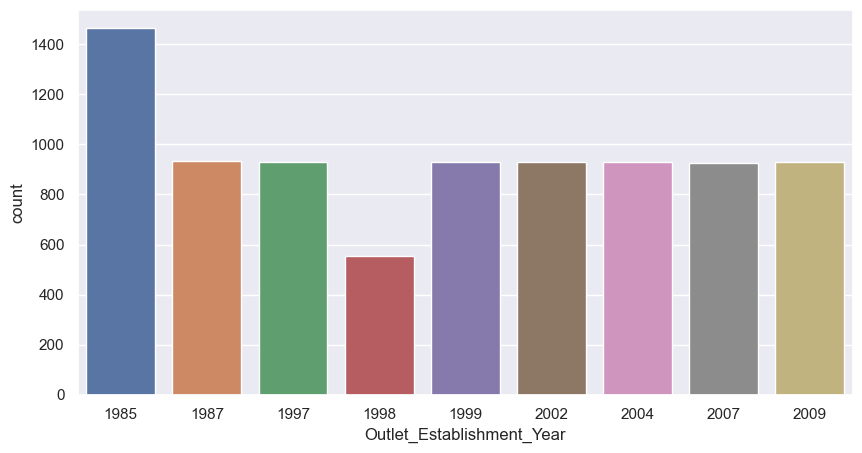

In [16]:
plt.figure(figsize= (10,5))
sb.countplot(data['Outlet_Establishment_Year'])
plt.show()

### Sales with respect to Item Type

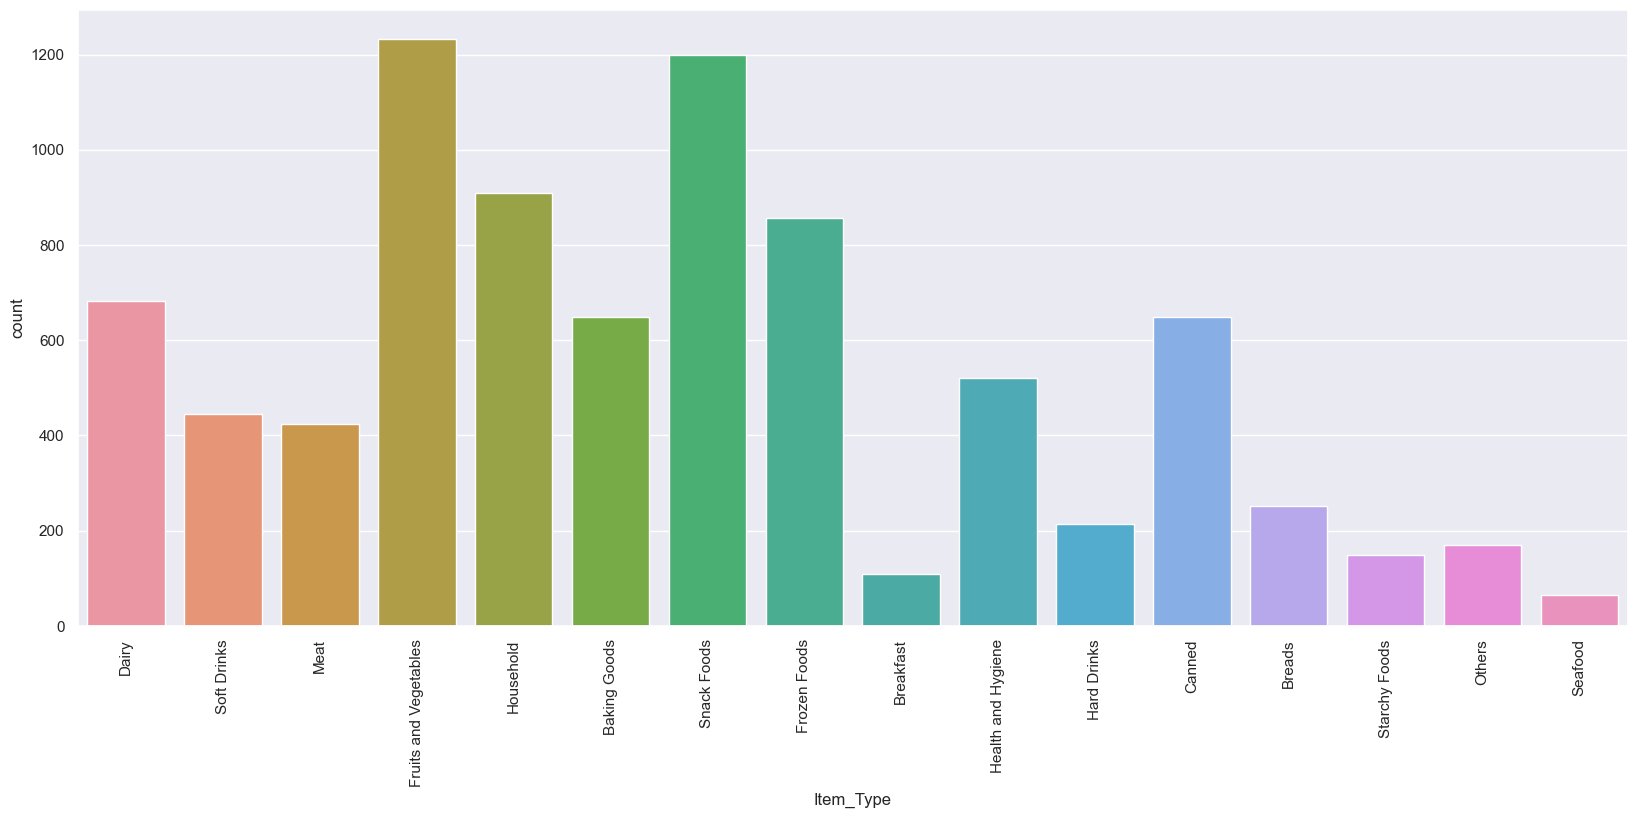

In [17]:
plt.figure(figsize= (20,8))
sb.countplot(x='Item_Type', data=data)
plt.xticks(rotation=90)
plt.show()

### Sales with respect to Outlet Size

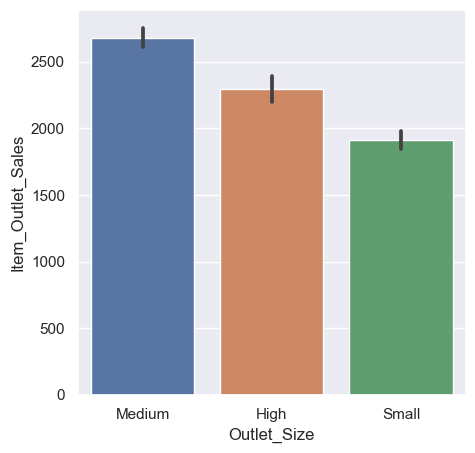

In [18]:
plt.figure(figsize= (5,5))
sb.barplot(data = data, x = 'Outlet_Size', y = 'Item_Outlet_Sales')
plt.show()

### Sales with respect to Outlet Location Type

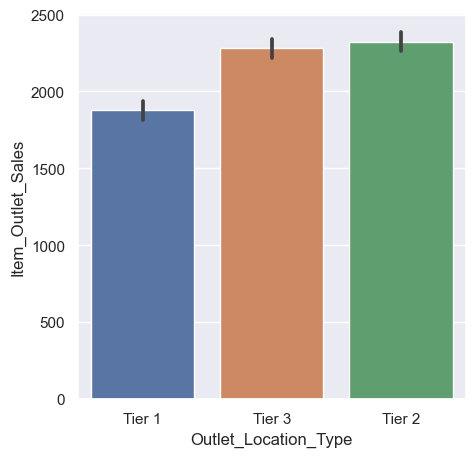

In [19]:
plt.figure(figsize= (5,5))
sb.barplot(data = data, x = 'Outlet_Location_Type', y = 'Item_Outlet_Sales')
plt.show()

### Sales with respect to Outlet Type

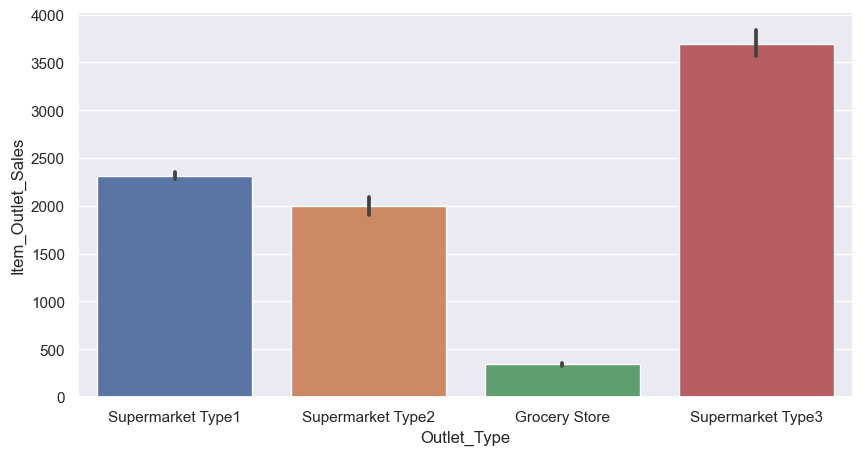

In [20]:
plt.figure(figsize= (10,5))
sb.barplot(data = data, x = 'Outlet_Type', y = 'Item_Outlet_Sales')
plt.show()

In [21]:
features=data.select_dtypes(include=['int64','float64'])
features.corr(method='pearson')

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
Item_Weight,1.000000,-0.014048,0.027141,-0.011588,0.014123
Item_Visibility,-0.014048,1.000000,-0.001315,-0.074834,-0.128625
Item_MRP,0.027141,-0.001315,1.000000,0.005020,0.567574
Outlet_Establishment_Year,-0.011588,-0.074834,0.005020,1.000000,-0.049135
Item_Outlet_Sales,0.014123,-0.128625,0.567574,-0.049135,1.000000


### Spearman correlation coefficient Heat map to show correlation between variables

<AxesSubplot:>

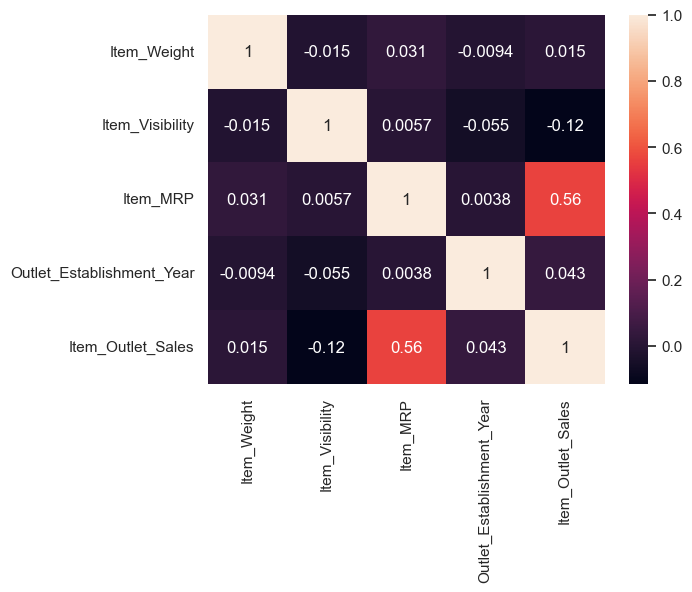

In [22]:
sb.heatmap(features.corr(method='spearman'),cbar=True,annot=True)

<hr style="height: 2px; border: none; color: #f1c40f; background-color: #002147;">
<p style="text-align: left; font-size: 1em; font-family: 'Arial'; color: #34495e;">
    
From the above EDA we can notice that
1. Low fat items sell more.
2. "Fruits and Vegetable" & "Snack Food" sell the most.
3. Sales of outlet established in 1985 is higher than others
4. Most sales are done by "Medium" size outlets.
5. There is a strong correlation between Item_MRP and Sales, while there a slight negative correlation with Item_Visibility.
    
</p>
<hr style="height: 2px; border: none; color: #f1c40f; background-color: #002147;">

## <div class="alert alert-success">Handling Missing Values.</div>

In [23]:
data.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

<hr style="height: 2px; border: none; color: #f1c40f; background-color: #002147;">
<p style="text-align: left; font-size: 1.5em; font-family: 'Arial'; font-weight: bold; color: black;"><font color=black>We can see above that</font>, <font color=red>Item_Weight <font color=black>and</font> Outlet_Size</font> <font color=black>have missing values</font>.</p>
<br>


<p style="text-align: left; font-size: 1.1em; font-family: 'Arial'; color: #34495e;">

Methods Available for handling missing values
1. Mean
2. Mode
3. Median

Note:
1. We take Mean for Numerical Values.
2. We take Mode for Categorical Values.

</p>
<br>
<hr style="height: 2px; border: none; color: #f1c40f; background-color: #002147;">

In [24]:
#Filling 'Item_Weight' with Mean values
data['Item_Weight'].mean()

12.857645184136183

In [25]:
data['Item_Weight'].fillna(data['Item_Weight'].mean(), inplace = True)

In [26]:
data.isnull().sum()

Item_Identifier                 0
Item_Weight                     0
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

<hr style="height: 2px; border: none; color: #f1c40f; background-color: #002147;">


#### We can see that 'Item_Weight' no more has any missing values

<hr style="height: 2px; border: none; color: #f1c40f; background-color: #002147;">


In [27]:
data['Item_Weight'].describe()

count    8523.000000
mean       12.857645
std         4.226124
min         4.555000
25%         9.310000
50%        12.857645
75%        16.000000
max        21.350000
Name: Item_Weight, dtype: float64

In [28]:
data.pivot_table(values = 'Outlet_Size',columns = 'Outlet_Type', aggfunc=(lambda x: x.mode()[0]))

Outlet_Type,Grocery Store,Supermarket Type1,Supermarket Type2,Supermarket Type3
Outlet_Size,Small,Small,Medium,Medium


In [29]:

mode_outlet_size = data.pivot_table(values = 'Outlet_Size',columns = 'Outlet_Type', aggfunc=(lambda x: x.mode()[0]))

data.loc[data['Outlet_Size'].isnull(),'Outlet_Size'] = data.loc[data['Outlet_Size'].isnull(),
                                                                'Outlet_Type'].apply(lambda x: mode_outlet_size[x] )

In [30]:
data.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

In [31]:
data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Small,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


## <div class="alert alert-success">Encoding.</div>


In [32]:
le = LabelEncoder()


In [33]:
data['Outlet_Identifier'] = le.fit_transform(data['Outlet_Identifier'])
data['Item_Fat_Content'] = le.fit_transform(data['Item_Fat_Content'])
data['Item_Type'] = le.fit_transform(data['Item_Type'])
data['Outlet_Identifier'] = le.fit_transform(data['Outlet_Identifier'])
data['Outlet_Size'] = le.fit_transform(data['Outlet_Size'])
data['Outlet_Location_Type'] = le.fit_transform(data['Outlet_Location_Type'])
data['Outlet_Type'] = le.fit_transform(data['Outlet_Type'])


In [34]:
data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,0,0.016047,4,249.8092,9,1999,1,0,1,3735.1380
1,DRC01,5.92,1,0.019278,14,48.2692,3,2009,1,2,2,443.4228
2,FDN15,17.50,0,0.016760,10,141.6180,9,1999,1,0,1,2097.2700
3,FDX07,19.20,1,0.000000,6,182.0950,0,1998,2,2,0,732.3800
4,NCD19,8.93,0,0.000000,9,53.8614,1,1987,0,2,1,994.7052


## <div class="alert alert-success">PreProcessing Data.</div>


In [35]:
data = data.drop(columns=['Outlet_Identifier'])

In [36]:
scaler = StandardScaler()

data[['Item_Weight', 'Item_Visibility', 'Item_MRP']] = scaler.fit_transform(data[['Item_Weight', 'Item_Visibility', 'Item_MRP']])

In [37]:
X = data.drop(columns=['Item_Identifier','Item_Outlet_Sales'])
Y = data['Item_Outlet_Sales']

In [38]:
X.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,-0.841872,0,-0.970732,4,1.747454,1999,1,0,1
1,-1.641706,1,-0.908111,14,-1.489023,2009,1,2,2
2,1.098554,0,-0.956917,10,0.010040,1999,1,0,1
3,1.500838,1,-1.281758,6,0.660050,1998,2,2,0
4,-0.929428,0,-1.281758,9,-1.399220,1987,0,2,1


## <div class="alert alert-success">Train Test Split</div>


In [39]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.20)

## <div class="alert alert-success">Linear Regression.</div>


In [40]:
LR_model = LinearRegression()
LR_model.fit(X_train, Y_train)
Y_pred_LR = LR_model.predict(X_test)
r2_LR = r2_score(Y_test, Y_pred_LR)

In [41]:
print("Accuracy:", r2_LR*100)

Accuracy: 51.84830218758136


## <div class="alert alert-success">Lasso Regression.</div>


In [42]:
LS_model = Lasso(alpha = 0.05)
LS_model.fit(X_train,Y_train)
Y_predict_LS = LS_model.predict(X_test)
r2_LS = r2_score(Y_test, Y_predict_LS)*100

In [43]:
print("Accuracy:", r2_LS)

Accuracy: 51.848807658376096


## <div class="alert alert-success">Ridge Regression.</div>


In [44]:
RR_model = Ridge(alpha = 0.05)
RR_model.fit(X_train,Y_train)
Y_predict_RR = RR_model.predict(X_test)
r2_RR = r2_score(Y_test, Y_predict_RR)*100

In [45]:
print("Accuracy:", r2_RR)

Accuracy: 51.848286077418095


## <div class="alert alert-success">Random Forest.</div>


In [46]:
RF_model = RandomForestRegressor(n_estimators = 100)
RF_model.fit(X_train,Y_train)
Y_predict_RF = RF_model.predict(X_test)
r2_RF = r2_score(Y_test, Y_predict_RF)*100

In [47]:
print("Accuracy:", r2_RF)

Accuracy: 57.703501565142986


## <div class="alert alert-success">XGBoost.</div>


In [48]:
XGB_model = xgb.XGBRegressor()
XGB_model.fit(X_train,Y_train)
Y_predict_XGB = XGB_model.predict(X_test)
r2_XGB = r2_score(Y_test, Y_predict_XGB)*100

In [49]:
print("Accuracy:", r2_XGB)

Accuracy: 54.32401765046336


## <div class="alert alert-success">Results.</div>

In [51]:
from tabulate import tabulate

table = [['Algorithms', 'Accuracy'],["Linear Regression",r2_LR*100],["Lasso Regression",r2_LS],["Ridge Regression",r2_RR],["Random Forest",r2_RF],["XGBoost",r2_XGB]]
print(tabulate(table, headers='firstrow', tablefmt='fancy_grid', showindex = range(1,6)))

╒════╤═══════════════════╤════════════╕
│    │ Algorithms        │   Accuracy │
╞════╪═══════════════════╪════════════╡
│  1 │ Linear Regression │    51.8483 │
├────┼───────────────────┼────────────┤
│  2 │ Lasso Regression  │    51.8488 │
├────┼───────────────────┼────────────┤
│  3 │ Ridge Regression  │    51.8483 │
├────┼───────────────────┼────────────┤
│  4 │ Random Forest     │    57.7035 │
├────┼───────────────────┼────────────┤
│  5 │ XGBoost           │    54.324  │
╘════╧═══════════════════╧════════════╛


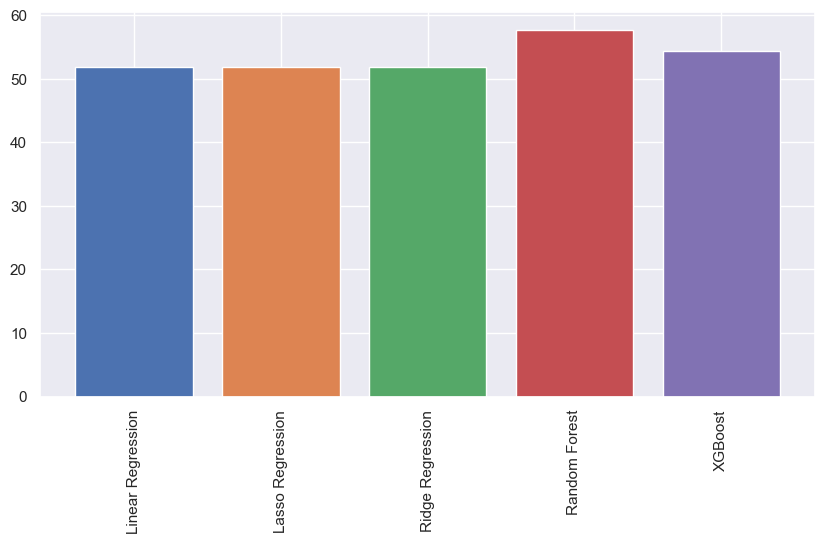

In [54]:
plt.figure(figsize=(10,5))

labels_bar1 = ["Linear Regression"]
values_bar1 = [r2_LR*100]
plt.bar(labels_bar1, values_bar1 , label="Linear Regression")

labels_bar2 = ["Lasso Regression"]
values_bar2 = [r2_LS]
plt.bar(labels_bar2, values_bar2 , label="Lasso Regression")

labels_bar3 = ["Ridge Regression"]
values_bar3 = [r2_RR]
plt.bar(labels_bar3, values_bar3 , label="Ridge Regression")

labels_bar4 = ["Random Forest"]
values_bar4 = [r2_RF]
plt.bar(labels_bar4, values_bar4 , label="Random Forest")

labels_bar5 = ["XGBoost"]
values_bar5 = [r2_XGB]
plt.bar(labels_bar5, values_bar5 , label="XGBoost")

plt.xticks(rotation=90)
plt.show()

<hr style="height: 2px; border: none; color: #f1c40f; background-color: #002147;">
<p style="text-align: left; font-size: 1.5em; font-family: 'Arial'; font-weight: bold; color: black;"><font color=black>We can see that</font> <font color=red>Random Forest <font color=black>and</font> XGBoost</font> <font color=black>have best performance in our case</font>.</p>
<hr style="height: 2px; border: none; color: #f1c40f; background-color: #002147;">

## <div class="alert alert-success">Summary.</div>


<hr style="height: 2px; border: none; color: #f1c40f; background-color: #002147;">
<p style="text-align: left; font-size: 1.5em; font-family: 'Arial'; font-weight: bold; color: black;"><font color=black>We can conclude that </font> <font color=red>Item Maximum Retail Price (Item_MRP) </font> <font color=black>has the most impact on our sales</font>.</p>

<p style="text-align: left; font-size: 1.5em; font-family: 'Arial'; font-weight: bold; color: black;"><font color=black>Larger Store size does not means more sales, infact </font> <font color=red>Tier 2 <font color=black>and </font>Medium Size </font> <font color=black>stores generated the most sales</font>.</p>

<p style="text-align: left; font-size: 1.5em; font-family: 'Arial'; font-weight: bold; color: black;"><font color=black>More locations shall be transformed into </font> <font color=red>Supermarket Type 3 </font> <font color=black>to generate more sales</font>.</p>
<hr style="height: 2px; border: none; color: #f1c40f; background-color: #002147;">